In [14]:
# =============================================================================
# Determining Diabetes
# =============================================================================
################################# Required packages ############################
# To work with dataframes
import pandas as pd

# To perform numerical operations
import numpy as np

# To visualize data
import seaborn as sns

#To plot
import matplotlib.pyplot as plt

# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

###############################################################################
# =============================================================================
# Importing data
# =============================================================================
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"                                     #,na_values=[" ?"])

# Defining column names
col_names = ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']

# Loading the data
diabetes_data = pd.read_csv(url, names=col_names)

#Seeing the data table
from google.colab import data_table
data_table.enable_dataframe_formatter()
diabetes_data

#print(diabetes_data.head())

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
#Exploratory data analysis:

#1.Getting to know the data
#2.Data preprocessing (Missing values)
#3.Cross tables and data visualization

# =============================================================================
# Getting to know the data
# =============================================================================
#**** To check variables' data type
print(diabetes_data.info())

#**** Check for missing values
diabetes_data.isnull()

print('Data columns with null values:\n', diabetes_data.isnull().sum())
#No missing values. /but, there are many enteries as 0 which shouldn't have been.

#Finf unique values in each column
# print(np.unique(diabetes_data['Glucose']))
# print(np.unique(diabetes_data['Pregnancies']))
# print(np.unique(diabetes_data['BP']))
# print(np.unique(diabetes_data['SkinThickness']))
# print(np.unique(diabetes_data['Insulin']))
# print(np.unique(diabetes_data['BMI']))
# print(np.unique(diabetes_data['Pedigree']))
# print(np.unique(diabetes_data['Age']))

## Missing values are encoded as 0. For example, a Blood Pressure or BMI of 0 is
# medically impossible. Before running the model, we should replace those zeros
# with the median of the column

#**** Summary of numerical variables
summary_num = diabetes_data.describe()
print(summary_num)

# Example: Replacing 0s with NaN and then filling with median
cols_to_fix = ['Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[cols_to_fix] = diabetes_data[cols_to_fix].replace(0, np.nan)
diabetes_data.fillna(diabetes_data.median(), inplace=True)

diabetes_data.head(n=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BP             768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Data columns with null values:
 Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64
       Pregnancies     Glucose          BP  SkinThickness     Insulin  \
count   768.000000  768.000000  768.000000     768.000000  768.0000

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [16]:
# Realtionship between independent variables
correlation = diabetes_data.corr()
print(correlation)


               Pregnancies   Glucose        BP  SkinThickness   Insulin  \
Pregnancies       1.000000  0.128213  0.208615       0.081770  0.025047   
Glucose           0.128213  1.000000  0.218937       0.192615  0.419451   
BP                0.208615  0.218937  1.000000       0.191892  0.045363   
SkinThickness     0.081770  0.192615  0.191892       1.000000  0.155610   
Insulin           0.025047  0.419451  0.045363       0.155610  1.000000   
BMI               0.021559  0.231049  0.281257       0.543205  0.180241   
Pedigree         -0.033523  0.137327 -0.002378       0.102188  0.126503   
Age               0.544341  0.266909  0.324915       0.126107  0.097101   
Outcome           0.221898  0.492782  0.165723       0.214873  0.203790   

                    BMI  Pedigree       Age   Outcome  
Pregnancies    0.021559 -0.033523  0.544341  0.221898  
Glucose        0.231049  0.137327  0.266909  0.492782  
BP             0.281257 -0.002378  0.324915  0.165723  
SkinThickness  0.543205  

<Axes: xlabel='Age', ylabel='Count'>

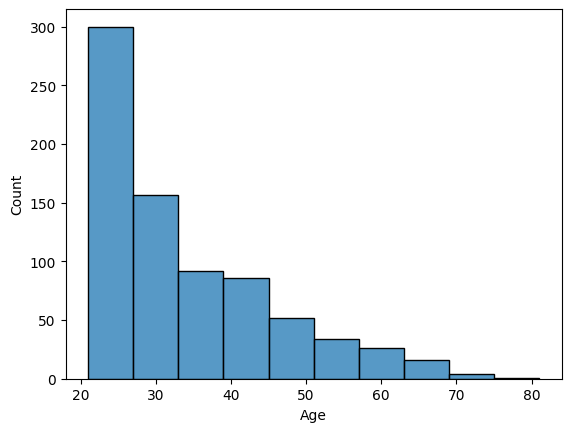

In [17]:
#Visualizing data
sns.histplot(diabetes_data['Age'], bins=10, kde=False)

/tmp/ipython-input-1624084105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Pedigree', data=diabetes_data, palette='Set2')


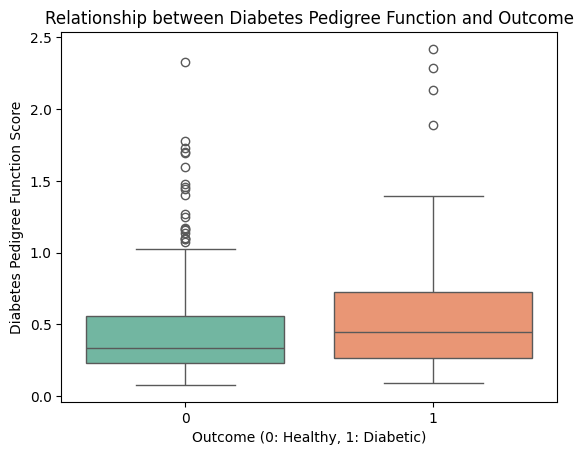

In [18]:
# ############# Box Plot - Pedigree vs Diabetes outcome #################
sns.boxplot(x='Outcome', y='Pedigree', data=diabetes_data, palette='Set2')

# Add labels and title
plt.title('Relationship between Diabetes Pedigree Function and Outcome')
plt.xlabel('Outcome (0: Healthy, 1: Diabetic)')
plt.ylabel('Diabetes Pedigree Function Score')
plt.show()


**How to Interpret this Boxplot**

**The Median (The Line inside the Box):**
Notice that the median line for the "Diabetic" group (1) is significantly higher than for the "Healthy" group (0). This suggests that people with a higher genetic risk score are indeed more likely to be diagnosed with diabetes.

**The Interquartile Range (The Box):**
 The box for Class 1 is "taller" and shifted upward. This indicates that even the middle 50% of diabetic patients tend to have higher pedigree scores than their healthy counterparts.

**Outliers (The Individual Dots):**
You will see dots appearing above the whiskers. These represent patients with exceptionally high family risk scores. Interestingly, even in the "Healthy" group, there are outliers with high risk scores who have not developed diabetes—likely due to other factors like diet, exercise, or age.

**Separability:** Because there is a clear "step" between the two boxes, this confirms that Diabetes Pedigree Function is a strong candidate for your classification model. If the two boxes were perfectly level with each other, the feature would likely be a poor predictor.

/tmp/ipython-input-3761623234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=diabetes_data, palette='Set2')


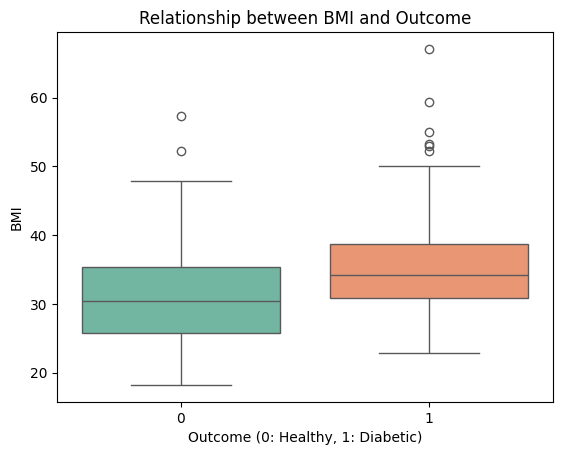

In [19]:
sns.boxplot(x='Outcome', y='BMI', data=diabetes_data, palette='Set2')
# Add labels and title
plt.title('Relationship between BMI and Outcome')
plt.xlabel('Outcome (0: Healthy, 1: Diabetic)')
plt.ylabel('BMI')
plt.show()


/tmp/ipython-input-703754131.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Pregnancies', data=diabetes_data, palette='Set2')


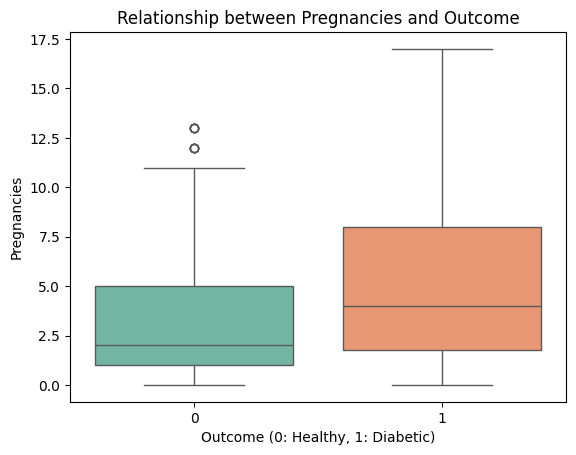

In [20]:
sns.boxplot(x='Outcome', y='Pregnancies', data=diabetes_data, palette='Set2')
# Add labels and title
plt.title('Relationship between Pregnancies and Outcome')
plt.xlabel('Outcome (0: Healthy, 1: Diabetic)')
plt.ylabel('Pregnancies')
plt.show()

In [21]:
# LOGISTIC REGRESSION
# =============================================================================

# Separating features (KEEP AS DATAFRAME - remove .values)
y = diabetes_data['Outcome']
x = diabetes_data.drop(columns=['Outcome']) # Cleaner way to get features

# 3. Splitting (When X is a DataFrame, train_x stays a DataFrame)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0,stratify=y)

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler() #reqd becoz logistic reg is sacle sensitive

# Fit on training data and transform both
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Make an instance of the Model
logistic = LogisticRegression(max_iter=1000)

# Fitting the values for x and y
logistic.fit(train_x_scaled,train_y)
logistic.coef_
logistic.intercept_

prediction = logistic.predict(test_x_scaled)

#Evaluate model performance using AUC on unseen data
from sklearn.metrics import roc_auc_score

test_y_prob=logistic.predict_proba(test_x_scaled)[:,1]
auc_f=roc_auc_score(test_y,test_y_prob)
print('AUC:',auc_f)




AUC: 0.8603292181069958


[[133  17]
 [ 38  43]]


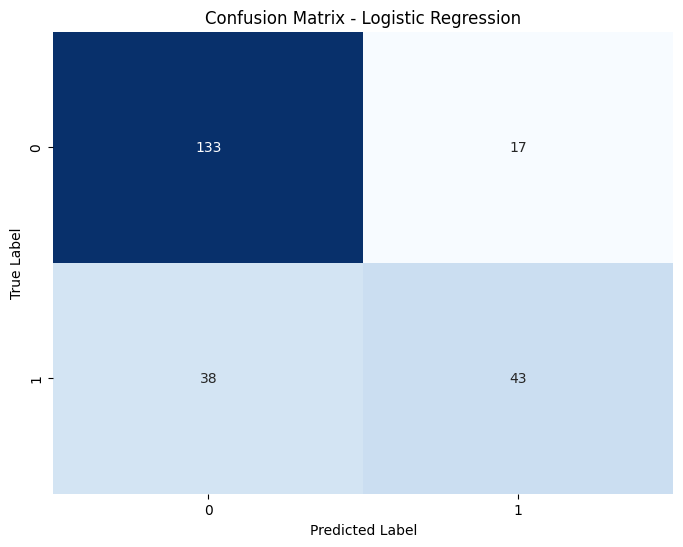

0.7619047619047619
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       150
           1       0.72      0.53      0.61        81

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

0.7087654320987655


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


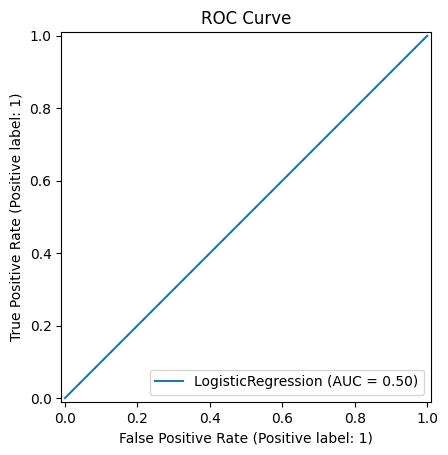

AUC before any filtering 0.5
Misclassified samples: 55


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [22]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=logistic.classes_, yticklabels=logistic.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

from sklearn.metrics import classification_report
print(classification_report(test_y, prediction))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(test_y, prediction))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logistic, test_x, test_y)
plt.title("ROC Curve")
plt.show()

test_y_prob=logistic.predict_proba(test_x)[:,1]
auc=roc_auc_score(test_y,test_y_prob)
print('AUC before any filtering',auc)

# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y != prediction).sum())